In [3]:
pip install pandas matplotlib seaborn scikit-learn    #Step 1: Load and Explore the Data


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd

df = pd.read_csv(r'C:\Users\admin\Downloads\sample_sales_data.csv')
print(df.head())  # Display first few rows
print(df.info())  # Check data types & missing values
print(df.describe())  # Summary statistics

   Customer_ID  Purchase_Amount Product_Category  Quantity Purchase_Date  \
0         1001           811.63         Clothing         3    2024-01-28   
1         1002          1906.36         Clothing         2    2024-01-28   
2         1003          1490.79       Home Decor         3    2024-02-13   
3         1004          1237.45         Clothing         1    2024-02-13   
4         1005           396.44         Clothing         1    2024-01-20   

   Customer_Age  Gender           City  
0            34    Male    Los Angeles  
1            19    Male  San Francisco  
2            19   Other       New York  
3            45  Female        Houston  
4            40    Male       New York  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50 non-null     int64  
 1   Purchase_Amount   50 non-null     float64
 2   Pr

In [11]:
#Step 2: Data Cleaning
print(df.isnull().sum())  # Count missing values
print(df.duplicated().sum())  # Count duplicate rows

Customer_ID         0
Purchase_Amount     0
Product_Category    0
Quantity            0
Purchase_Date       0
Customer_Age        0
Gender              0
City                0
dtype: int64
0


In [21]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Fill missing values in numeric columns with the mean of each column
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

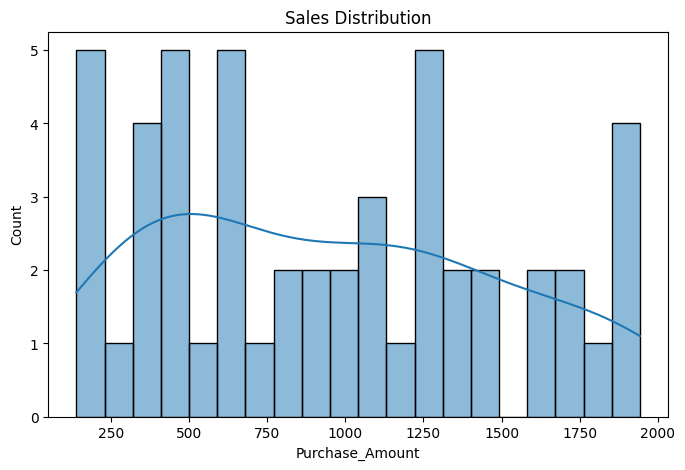

In [26]:
#Step 3: Exploratory Data Analysis (EDA)
#1️⃣ Univariate Analysis
#Visualizing sales distribution:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Purchase_Amount"], bins=20, kde=True)
plt.title("Sales Distribution")
plt.show()


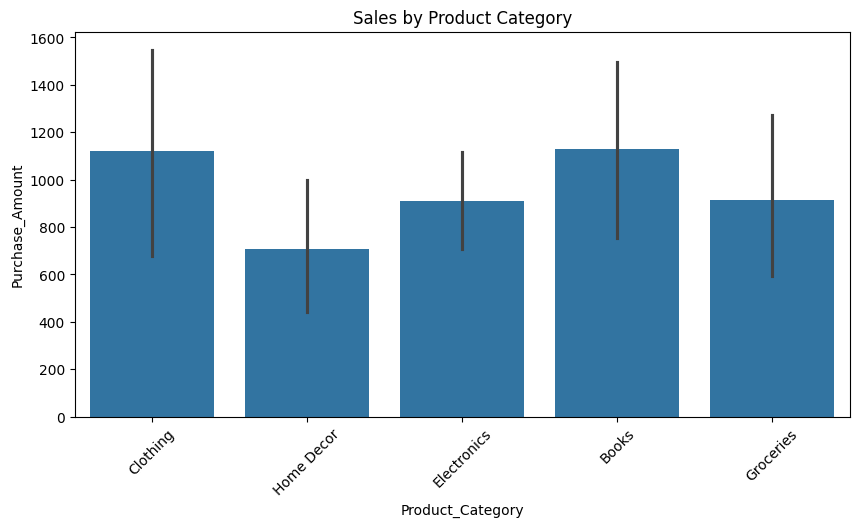

In [27]:
#2️⃣ Bivariate Analysis
#Sales by product category:
plt.figure(figsize=(10, 5))
sns.barplot(x="Product_Category", y="Purchase_Amount", data=df)
plt.xticks(rotation=45)
plt.title("Sales by Product Category")
plt.show()


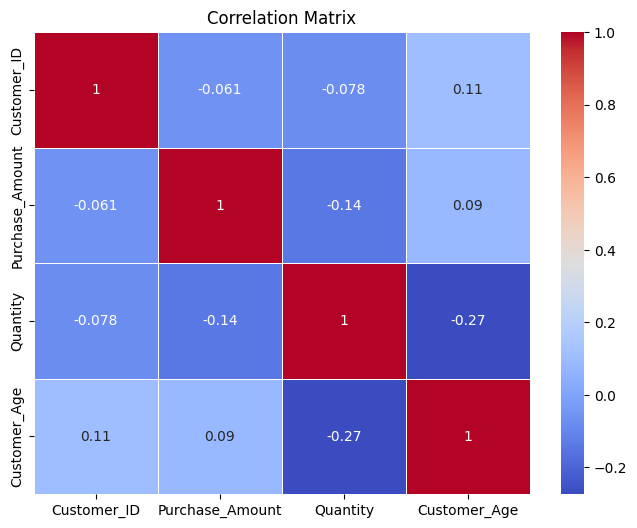

In [29]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [38]:
#✅ Step 4: Machine Learning Model
#Objective: Predict future sales based on historical data

#1️⃣ Feature Engineering
#Convert dates into useful features:

df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"])
df["Year"] = df["Purchase_Date"].dt.year
df["Month"] = df["Purchase_Date"].dt.month
df["Day"] = df["Purchase_Date"].dt.day

In [44]:
#2️⃣ Split Data into Training & Testing
#Prepare the dataset for machine learning:

from sklearn.model_selection import train_test_split

X = df[["Year", "Month", "Day", "Quantity"]]
y = df["Purchase_Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#3️⃣ Train a Model
#Using Linear Regression for sales prediction:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [47]:
# 4️⃣ Evaluate the Model
# Check performance using Mean Absolute Error (MAE):

from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 325.5769214108637
R² Score: 0.006201186488654642
